In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [6]:
tokenizer = Tokenizer()

data = open('irish_lyrics.txt').read()
corpus = data.lower().split('\n')
corpus[0:10]

['come all ye maidens young and fair',
 'and you that are blooming in your prime',
 'always beware and keep your garden fair',
 'let no man steal away your thyme',
 'for thyme it is a precious thing',
 'and thyme brings all things to my mind',
 'nlyme with all its flavours, along with all its joys',
 'thyme, brings all things to my mind',
 'once i and a bunch of thyme',
 'i thought it never would decay']

In [7]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [8]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [12]:
print(xs[6])
print(ys[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]


In [13]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [16]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
377/377 [==============================] - 13s 36ms/step - loss: 6.6521 - accuracy: 0.0752
Epoch 2/100
377/377 [==============================] - 13s 35ms/step - loss: 5.7713 - accuracy: 0.1118
Epoch 3/100
377/377 [==============================] - 13s 35ms/step - loss: 4.8907 - accuracy: 0.1612
Epoch 4/100
377/377 [==============================] - 16s 43ms/step - loss: 3.9276 - accuracy: 0.2391
Epoch 5/100
377/377 [==============================] - 15s 40ms/step - loss: 3.0881 - accuracy: 0.3422
Epoch 6/100
377/377 [==============================] - 14s 37ms/step - loss: 2.3852 - accuracy: 0.4630
Epoch 7/100
377/377 [==============================] - 17s 45ms/step - loss: 1.8801 - accuracy: 0.5631
Epoch 8/100
377/377 [==============================] - 15s 40ms/step - loss: 1.5270 - accuracy: 0.6363
Epoch 9/100
377/377 [==============================] - 14s 38ms/step - loss: 1.2541 - accuracy: 0.7015
Epoch 10/100
377/377 [==============================] - 16s 44ms/step - l

377/377 [==============================] - 16s 42ms/step - loss: 0.8268 - accuracy: 0.7750
Epoch 80/100
377/377 [==============================] - 15s 40ms/step - loss: 0.7629 - accuracy: 0.7927
Epoch 81/100
377/377 [==============================] - 15s 40ms/step - loss: 0.7194 - accuracy: 0.8036
Epoch 82/100
377/377 [==============================] - 14s 37ms/step - loss: 0.7397 - accuracy: 0.8009
Epoch 83/100
377/377 [==============================] - 16s 42ms/step - loss: 0.7541 - accuracy: 0.7978
Epoch 84/100
377/377 [==============================] - 15s 40ms/step - loss: 0.8123 - accuracy: 0.7807
Epoch 85/100
377/377 [==============================] - 16s 43ms/step - loss: 0.8621 - accuracy: 0.7649
Epoch 86/100
377/377 [==============================] - 18s 47ms/step - loss: 0.9333 - accuracy: 0.7529
Epoch 87/100
377/377 [==============================] - 14s 38ms/step - loss: 0.9516 - accuracy: 0.7465
Epoch 88/100
377/377 [==============================] - 15s 41ms/step - loss:

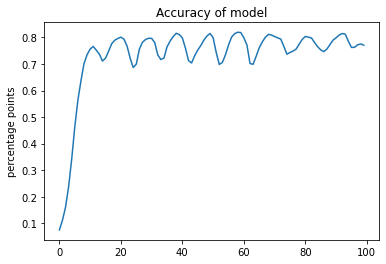

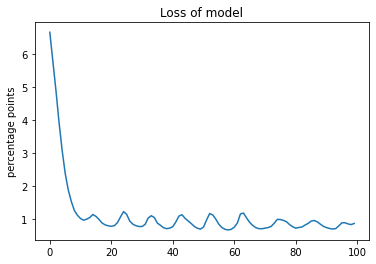

In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history):
    plt.plot(history.history['accuracy'])
    plt.ylabel('percentage points')
    plt.title('Accuracy of model')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.ylabel('percentage points')
    plt.title('Loss of model')
    plt.show()

plot_graphs(history)

In [19]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I've got a bad feeling about this send hed the tune o she sighed and high high high tree as ones gone gone gone gone is gone gone gone never is ours and one sun in a view of that fine city right gone gone gone never gone gone gone gone gone never gone gone alas like our youth too soon then it is like a ship sailing sailing gone gone gone gone gone gone alas had love your hand has you is pretty she is pretty saw high so gone gone alas like where gone gone gone gone gone gone gone alas night over drew my
